In [126]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt


In [127]:
df_og = pd.read_csv('Amazon_new_data.csv')
df_og.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN


# **Cleaning the Data**

> Removing the bad data which affects our Model

In [128]:
df=df_og

**After 13th Columns rest of the column are irrelevent**

In [129]:
df.isnull().sum()

uniq_id                                           2
product_name                                      2
manufacturer                                      9
price                                          1437
number_available_in_stock                      2502
number_of_reviews                                20
number_of_answered_questions                    767
average_review_rating                            20
amazon_category_and_sub_category                692
description                                     653
product_information                              61
product_description                             654
items_customers_buy_after_viewing_this_item    3068
customer_questions_and_answers                 9089
dtype: int64

In [130]:
df=df.drop('customer_questions_and_answers',axis=1)

In [131]:
df_null = df[['price','number_available_in_stock']].isna()
df_null.sum()

price                        1437
number_available_in_stock    2502
dtype: int64

Lets Drop those rows where price is NULL and Drop the columns which are not required

In [132]:
df.dropna(subset=['price'],axis=0,inplace=True)
df.drop(['uniq_id'],axis=1,inplace=True)


In [133]:
df['number_available_in_stock'].count()

6338

In [134]:
df['number_available_in_stock'].fillna(value='0 new',inplace=True)

In [135]:
df.head()

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,0 new,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,0 new,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,0 new,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...


Removing the data where manufacturer is null so that we get products only from trusted sources

In [136]:

df = df.dropna(subset=['amazon_category_and_sub_category'])

In [137]:
def Extra(str):
    if '-' in str:
        return True
    else:
      return False

df[df['price'].apply(Extra)]['price']

1801     £6.99 - £10.49
1808    £22.39 - £41.23
1814    £25.34 - £56.44
1837    £39.94 - £76.46
3182     £9.95 - £16.95
3239    £23.94 - £46.50
3259    £12.94 - £24.95
3262    £22.00 - £43.99
3267    £10.94 - £34.35
3272     £5.42 - £34.99
3300    £22.46 - £71.01
3325    £32.99 - £90.65
3335    £21.99 - £27.99
3342    £11.45 - £20.89
3348    £17.03 - £55.44
3355    £25.87 - £98.91
Name: price, dtype: object

In [138]:
def Extra(str):
    if ',' in str:
        return True
    else:
      return False

df[df['price'].apply(Extra)]['price']


7098    £2,439.92
Name: price, dtype: object

In [139]:
df[df['price'].str.contains('[A-Za-z]')]['price']

2003    {""subtext"":""A great selection of apps and g...
2005    {""subtext"":""A great selection of apps and g...
Name: price, dtype: object

In [140]:
df_new=df

In [141]:
df_new = df_new.drop(index=[2003, 2005])

## **Feature Engineering**

> Splitting the and storing the Data we want from a column

> Changing the Datatype Accordingly





In [142]:
name = '£269.00 - £699.99'
name.split(' - ')[1][1:]

'699.99'

In [143]:
def extract_prices(value):
    if('-' in value):
      prices = value.split(' - ')
      min_price = prices[0]
      max_price = prices[1]
      return ((float(min_price[1:])+float(max_price[1:]))/2)

    elif ',' in value:
      return value.replace(',', '')[1:]

    else:
      return value[1:]



In [144]:
df_new['Price(In £)'] = df_new['price'].apply(lambda x: extract_prices(x))

In [145]:
df_new['Price(In £)'] = df_new['Price(In £)'].astype(float)

In [146]:
df_new = df_new.drop(columns=['price'])
df_new.head()

,product_name,manufacturer,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,Price(In £)
0,Hornby 2014 Catalogue,Hornby,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,3.42
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,0 new,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,16.99
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,9.99
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,0 new,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,39.99
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,0 new,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,32.19


In [147]:
df_new['Price(In £)']
df=df_new

**In this coloumn the values are in the form of 'n out of 5',float typ and str**

In [148]:
def num(value):
    if isinstance(value, str):
        parts = value.split()
        if ('out' in value):
            return parts[0]
        else:
           return value
    else:
        return value

df['Rating(Out of 5)'] = df['average_review_rating'].apply(lambda x: num(x))


In [149]:
df = df.drop('average_review_rating',axis=1)

In [150]:
df['Rating(Out of 5)']= df['Rating(Out of 5)'].astype(float)

In [151]:
df['Stock Availible']=df['number_available_in_stock'].apply(lambda x: x.split()[0])

In [152]:
df = df.drop('number_available_in_stock',axis=1)

In [153]:
def replace(value):
  if(isinstance(value,str)):
    if (',' in value):
      return value.replace(',', '')
    else :
      return value
  else :
      return value

df['number_of_reviews']=df['number_of_reviews'].apply(lambda x: replace(x))

**Changing the Columns datatypes**

In [154]:
df['Stock Availible']=df['Stock Availible'].astype(int)
df['number_of_reviews']=df['number_of_reviews'].astype(float)

In [155]:
df.head()

,product_name,manufacturer,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,Price(In £),Rating(Out of 5),Stock Availible
0,Hornby 2014 Catalogue,Hornby,15.0,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,3.42,4.9,5
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2.0,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,16.99,4.5,0
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,9.99,3.9,2
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,39.99,5.0,0
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,32.19,4.7,0


<Axes: >

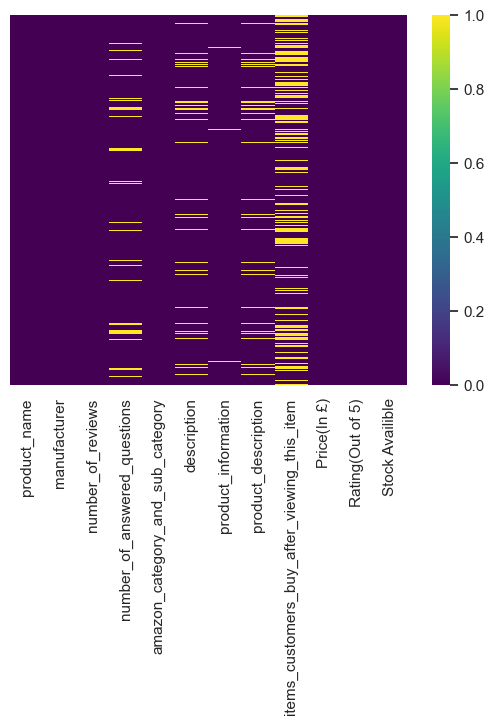

In [156]:
sn.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [157]:
def fl(value):
  if isinstance(value,float):
    return value
  else:
    return value.split(' > ')[0]

In [158]:
df['Category'] = df['amazon_category_and_sub_category'].apply(lambda x : fl(x))

In [159]:
df.head()

,product_name,manufacturer,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,Price(In £),Rating(Out of 5),Stock Availible,Category
0,Hornby 2014 Catalogue,Hornby,15.0,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,3.42,4.9,5,Hobbies
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2.0,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,16.99,4.5,0,Hobbies
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,9.99,3.9,2,Hobbies
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,39.99,5.0,0,Hobbies
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,32.19,4.7,0,Hobbies


## Data Visualization(Understanding Important Insights)


> 1.) **Find the Average Rating of Each Category and if they are trustable**

> 2.) **Find Average Price of Each Category on Amazon**

> 3.) **Find Stocks Availible in Each Category**

> 4.)**Find Top 10 Categories with subcategories which genereted the Highest     Revenue**

> 5.)**Top 10 Manufacturer in terms of Quantity of Item Sold**

> 6.) **How Much traffic are we getting from the Online Advertisements in terms of Revenue**

> 7.) **Show distribution of Price in Each Category**






**Number of Reviews is important so that we can understand if we can trust the ratings or not**

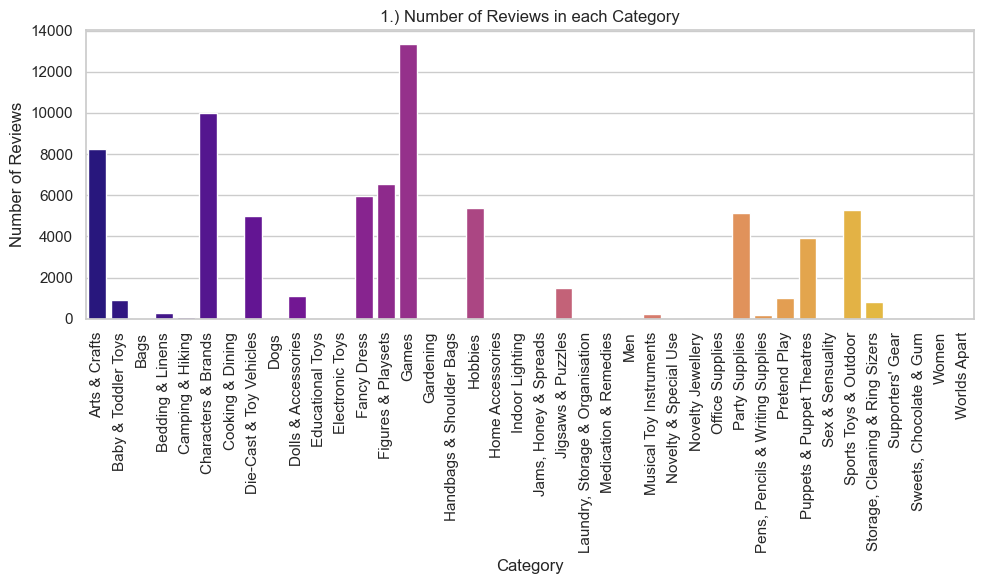

In [160]:
category_reviews = df.groupby('Category')['number_of_reviews'].sum().reset_index()

sn.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sn.barplot(x='Category', y='number_of_reviews', data=category_reviews,palette="plasma") 

plt.title('1.) Number of Reviews in each Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


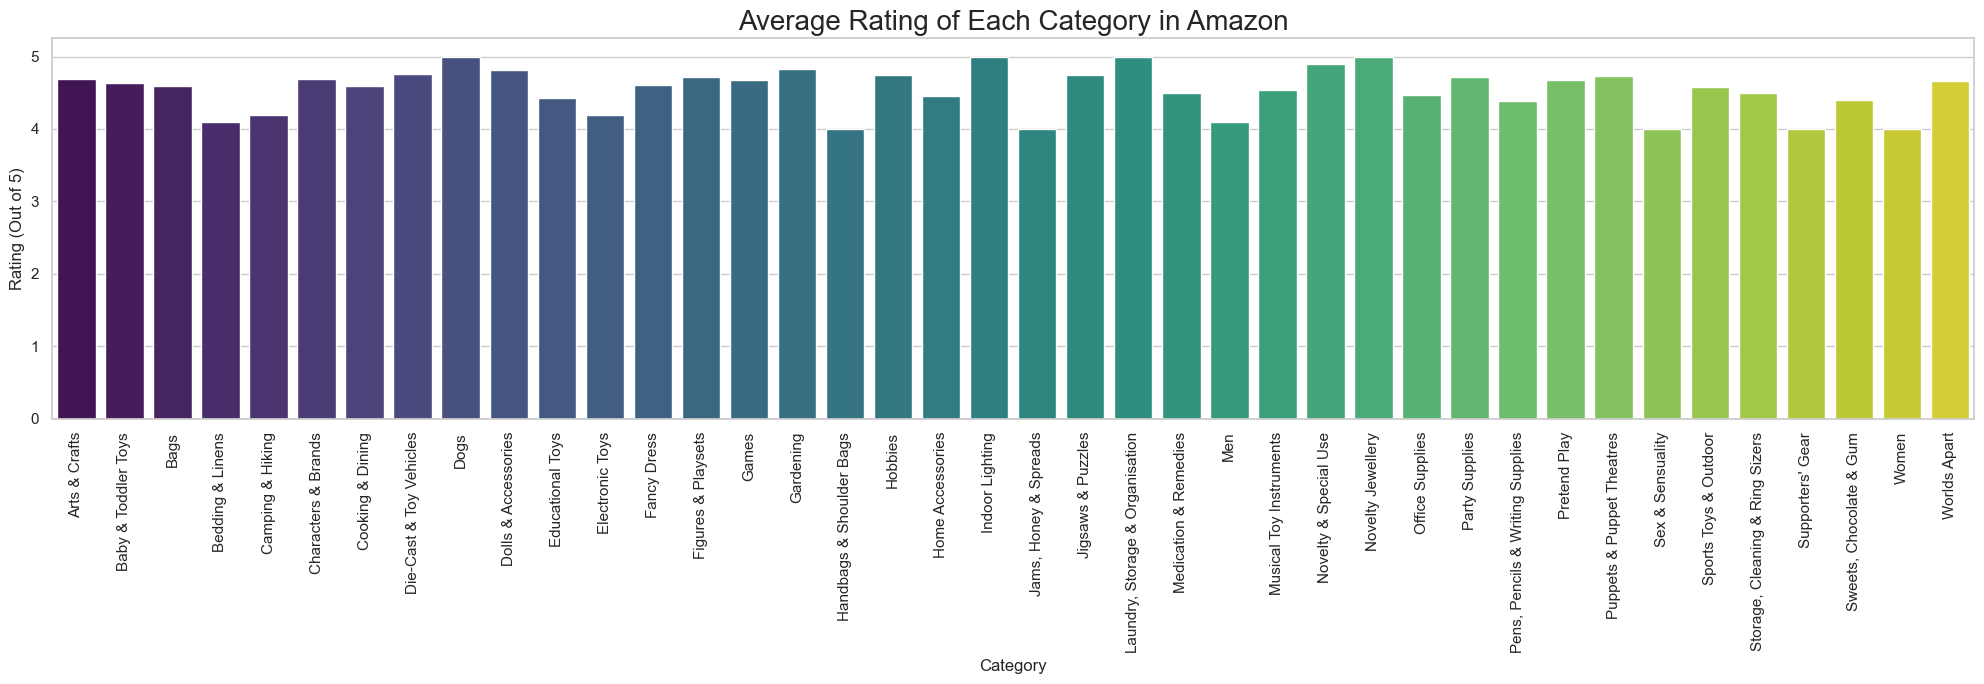

In [161]:
category_ratings = df.groupby('Category')['Rating(Out of 5)'].mean().reset_index()

# Set the style of the plot
sn.set(style="whitegrid")

plt.figure(figsize=(20, 7))
sn.barplot(x='Category', y='Rating(Out of 5)', data=category_ratings,
            palette="viridis")  


plt.title('Average Rating of Each Category in Amazon',fontsize=20)
plt.xlabel('Category')
plt.ylabel('Rating (Out of 5)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

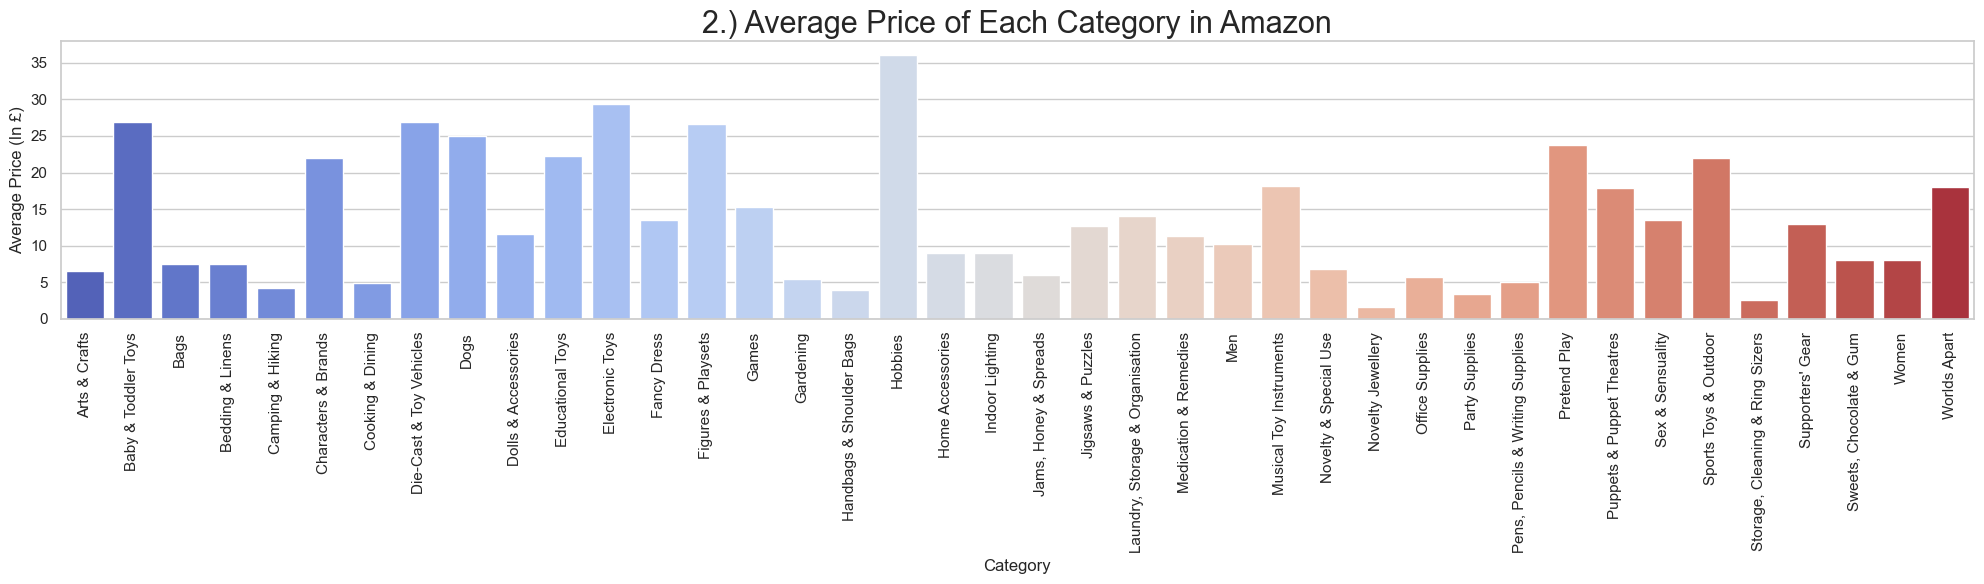

In [162]:
category_prices = df.groupby('Category')['Price(In £)'].mean().reset_index()


sn.set(style="whitegrid")

plt.figure(figsize=(20, 6))
sn.barplot(x='Category', y='Price(In £)', data=category_prices,
            palette="coolwarm")  # Set the color palette

plt.title('2.) Average Price of Each Category in Amazon',fontsize=22)
plt.xlabel('Category')
plt.ylabel('Average Price (In £)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Find : Availiblity of Stocks in Each Category**

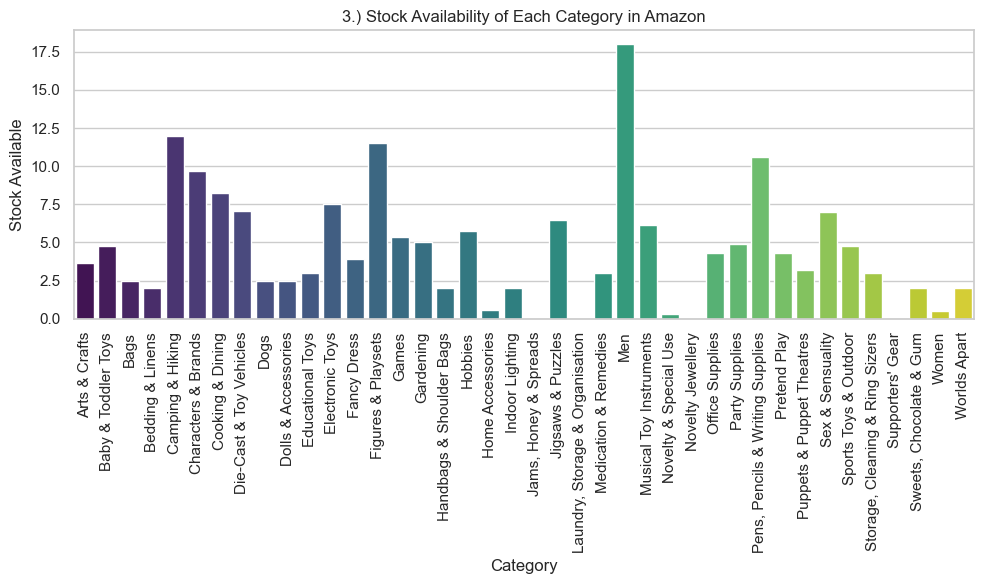

In [163]:
category_mean = df.groupby('Category')['Stock Availible'].mean().reset_index()

sn.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sn.barplot(x='Category', y='Stock Availible', data=category_mean,palette="viridis") 
plt.title('3.) Stock Availability of Each Category in Amazon')
plt.xlabel('Category')
plt.ylabel('Stock Available')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

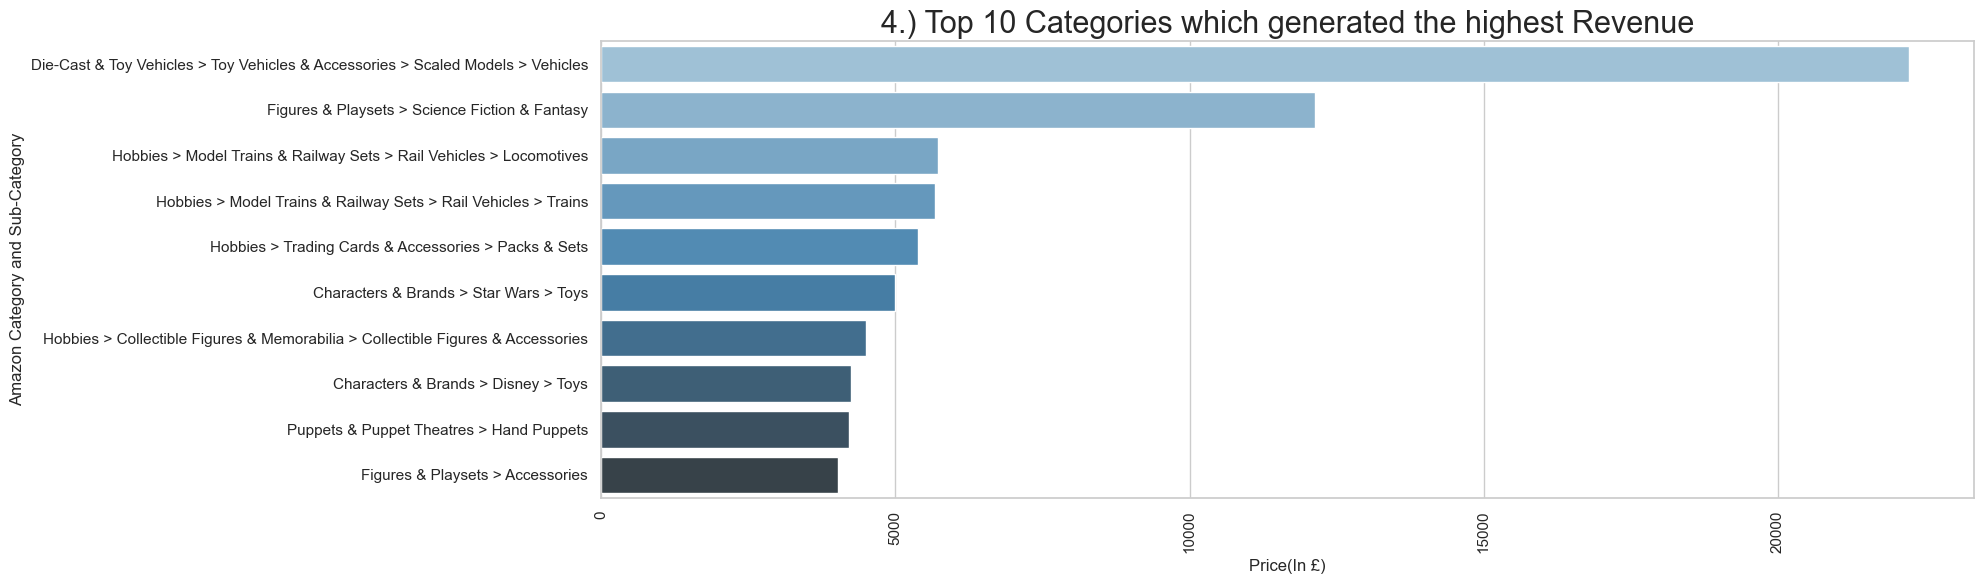

In [164]:
top_10 = df.groupby('amazon_category_and_sub_category')['Price(In £)'].sum().nlargest(10).reset_index()

sn.set(style="whitegrid")

plt.figure(figsize=(20, 6))
sn.barplot(x='Price(In £)', y='amazon_category_and_sub_category', data=top_10,
            palette="Blues_d") 

plt.title('4.) Top 10 Categories which generated the highest Revenue',fontsize=22)
plt.xlabel('Price(In £)')
plt.ylabel('Amazon Category and Sub-Category')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

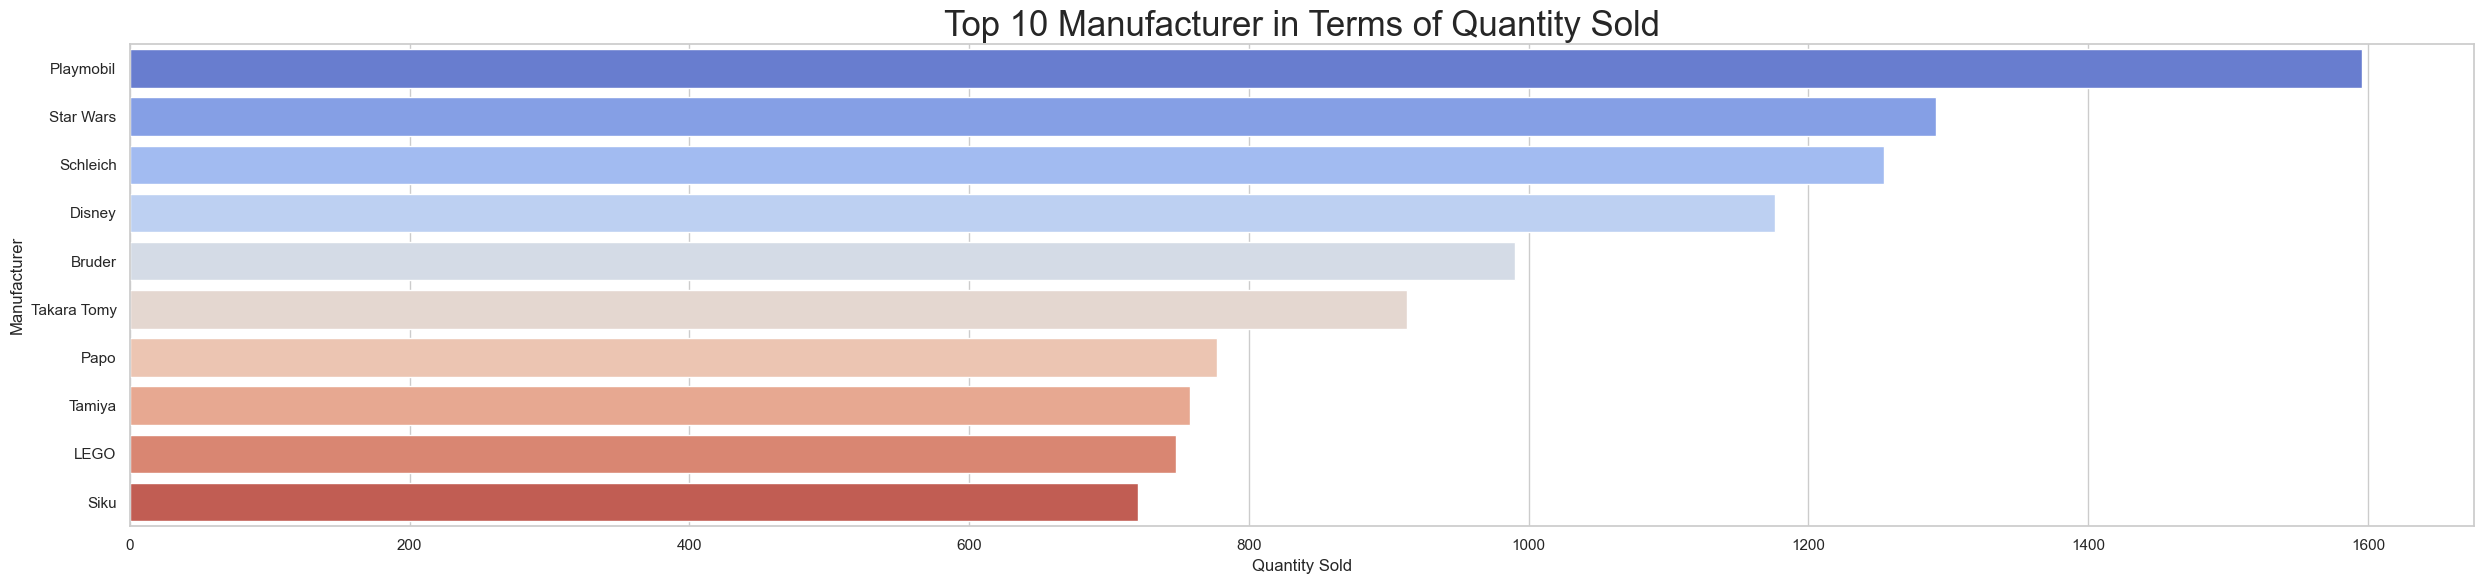

In [165]:
top10 = df.groupby('manufacturer')['Stock Availible'].sum().nlargest(10).reset_index()

# Set the style of the plot
sn.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(25, 6))
sn.barplot(x='Stock Availible', y='manufacturer', data=top10,
            palette="coolwarm")  # Set the color palette

# Set the title and labels
plt.title('Top 10 Manufacturer in Terms of Quantity Sold',fontsize=25)
plt.xlabel('Quantity Sold')
plt.ylabel('Manufacturer')

# Show the plot
plt.tight_layout()
plt.show()

# You can also see Top 10 Manufacturer in terms of Reveneue generated

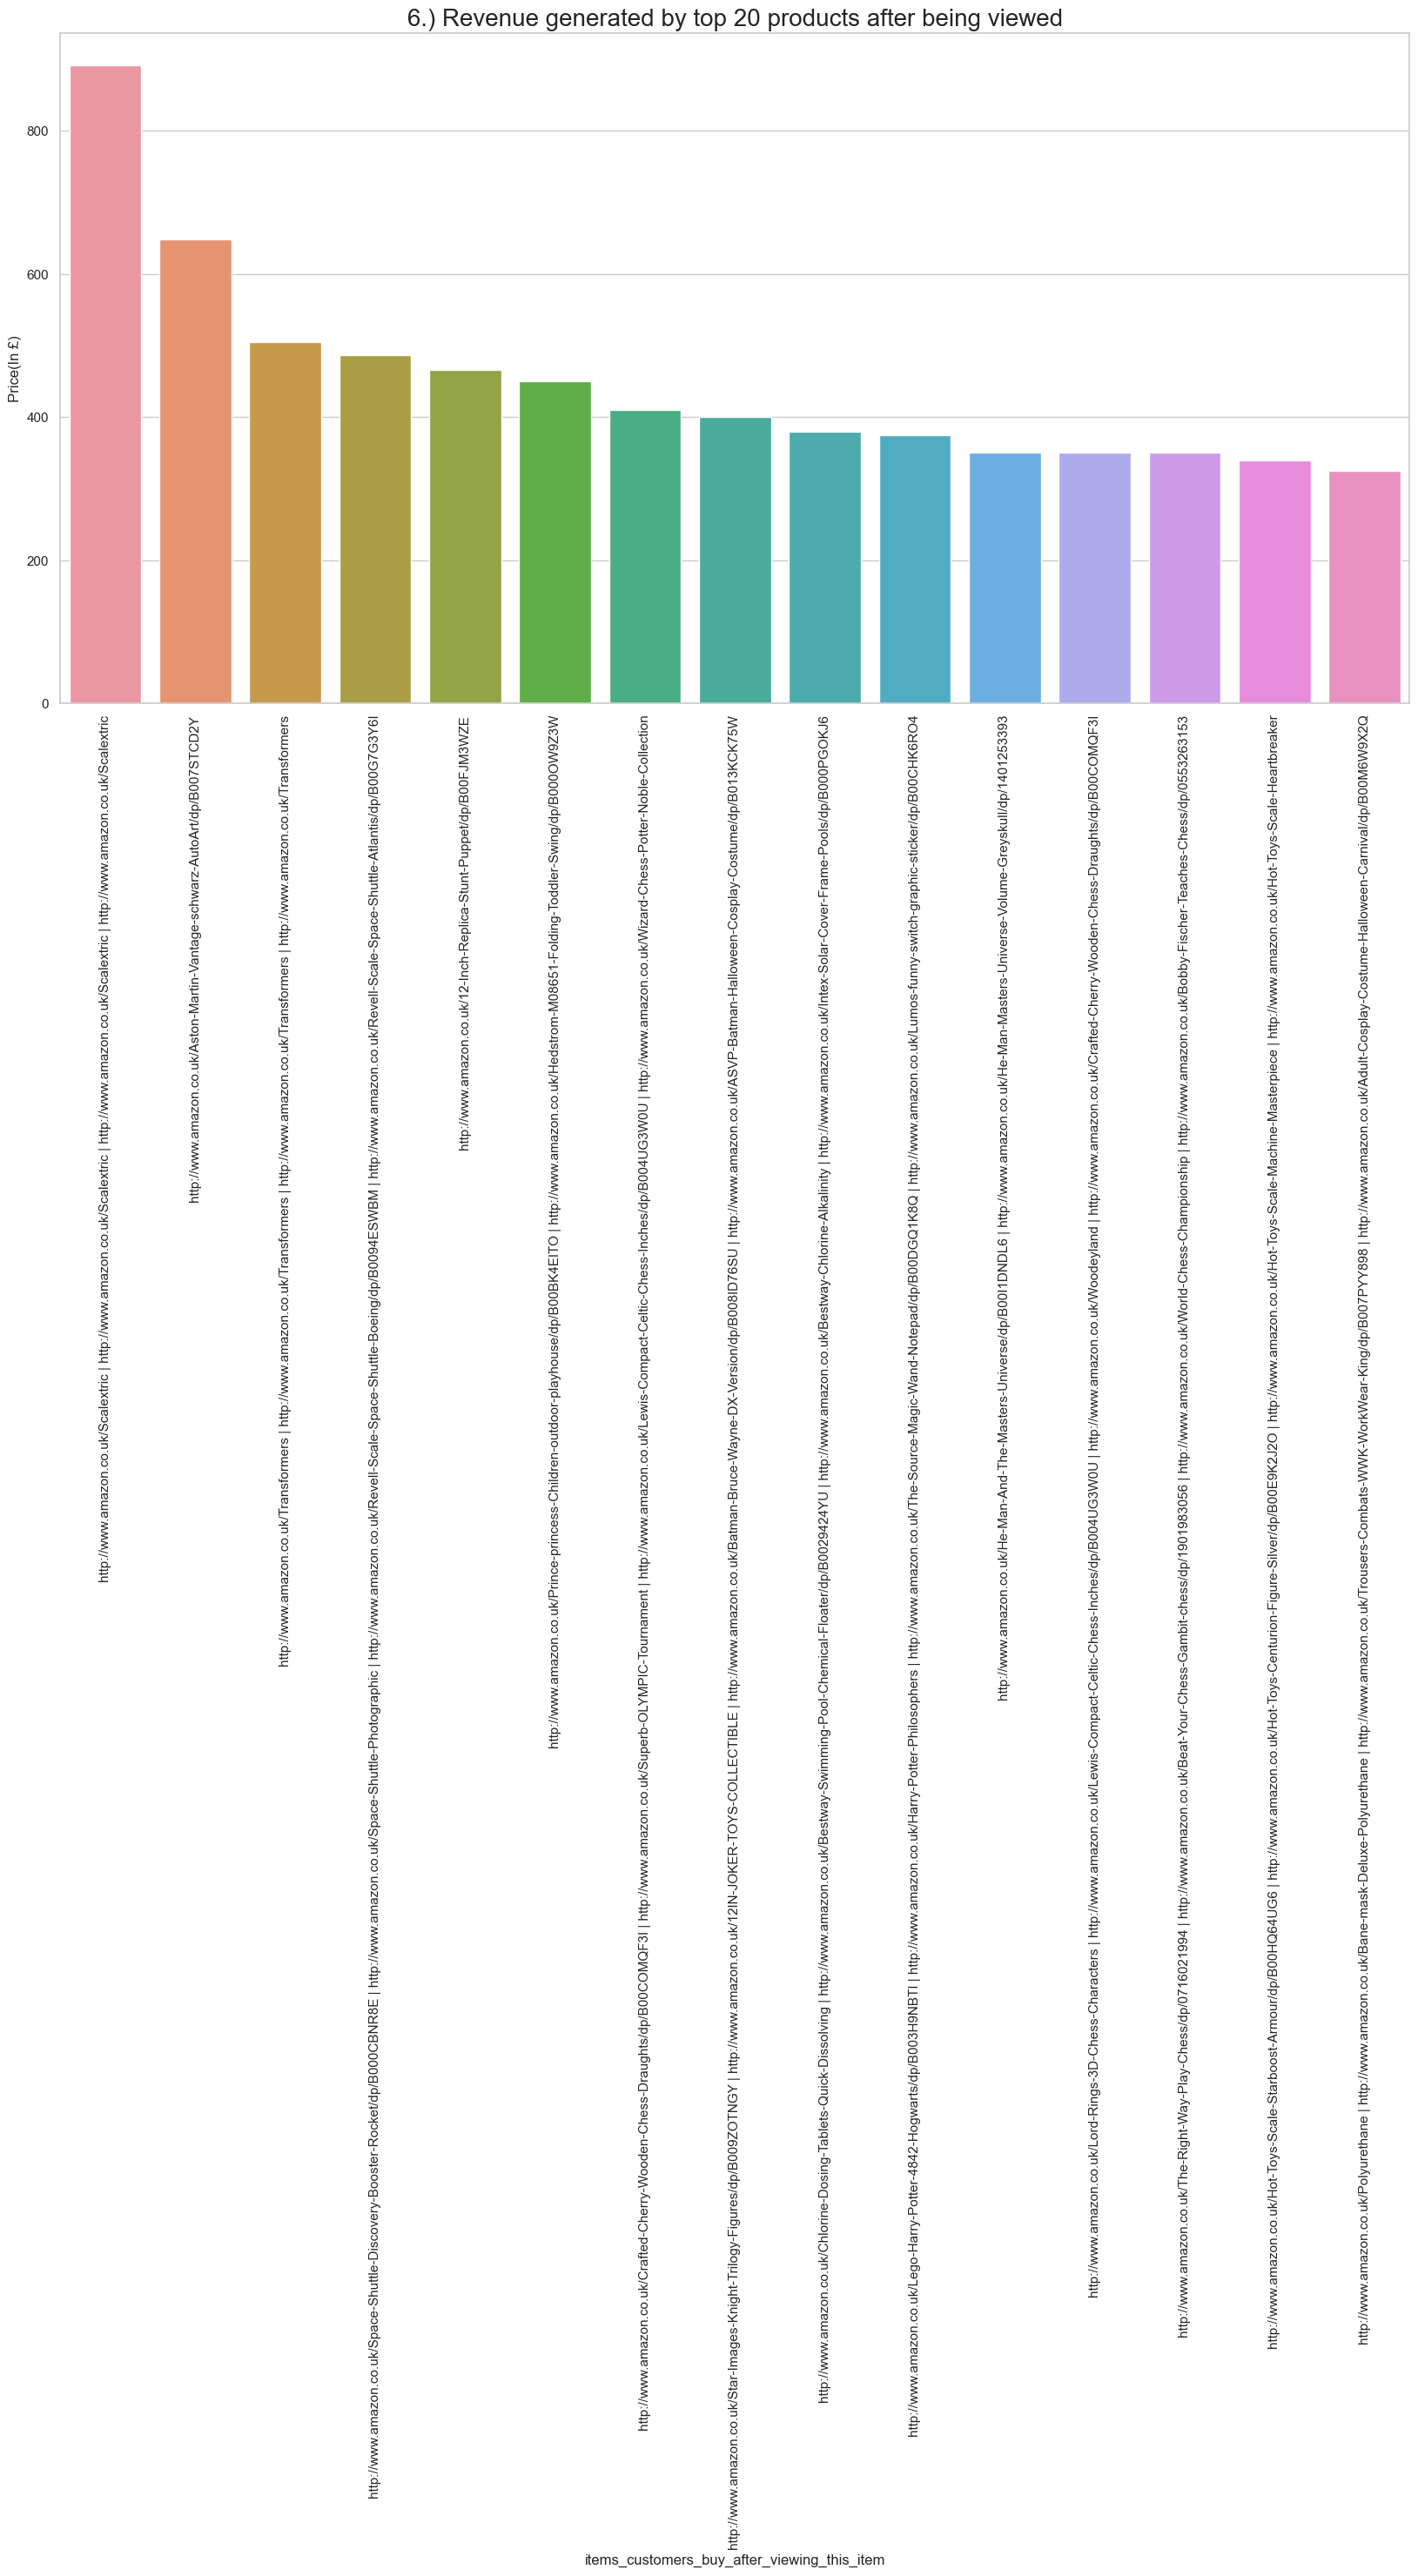

In [166]:
top_10 = df.groupby('items_customers_buy_after_viewing_this_item')['Price(In £)'].sum().nlargest(15).reset_index()

plt.figure(figsize=(20, 10))
sn.set_palette("viridis")  # You can choose any color palette from Seaborn
sn.barplot(data=top_10, x='items_customers_buy_after_viewing_this_item', y='Price(In £)')
plt.title('6.) Revenue generated by top 20 products after being viewed',fontsize=20)
plt.xticks(rotation=90)
plt.show()

# You can also see this in terms of Quantity

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Hobbies'),
  Text(1, 0, 'Characters & Brands'),
  Text(2, 0, 'Fancy Dress'),
  Text(3, 0, 'Arts & Crafts'),
  Text(4, 0, 'Games'),
  Text(5, 0, 'Figures & Playsets'),
  Text(6, 0, 'Die-Cast & Toy Vehicles'),
  Text(7, 0, 'Sports Toys & Outdoor'),
  Text(8, 0, 'Dolls & Accessories'),
  Text(9, 0, 'Puppets & Puppet Theatres')])

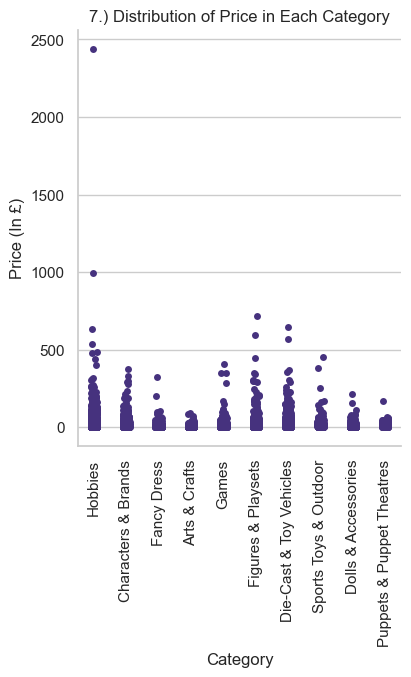

In [167]:
top10 = df.groupby('Category')['Price(In £)'].sum().nlargest(10).index

df_top10 = df[df['Category'].isin(top10)]

sn.catplot(x='Category', y='Price(In £)', data=df_top10)
plt.title('7.) Distribution of Price in Each Category')
plt.xlabel('Category')
plt.ylabel('Price (In £)')
plt.xticks(rotation=90)